In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('clear_algerian_fire_data.csv')

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df.drop(columns=['day', 'month', 'year'],axis=1,inplace=True)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [19]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [23]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [35]:
x = df.drop(['FWI'],axis = 1)

In [37]:
y = df['FWI']

In [39]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [41]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [49]:
x_train.shape, x_test.shape

((162, 11), (81, 11))

In [53]:
# feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


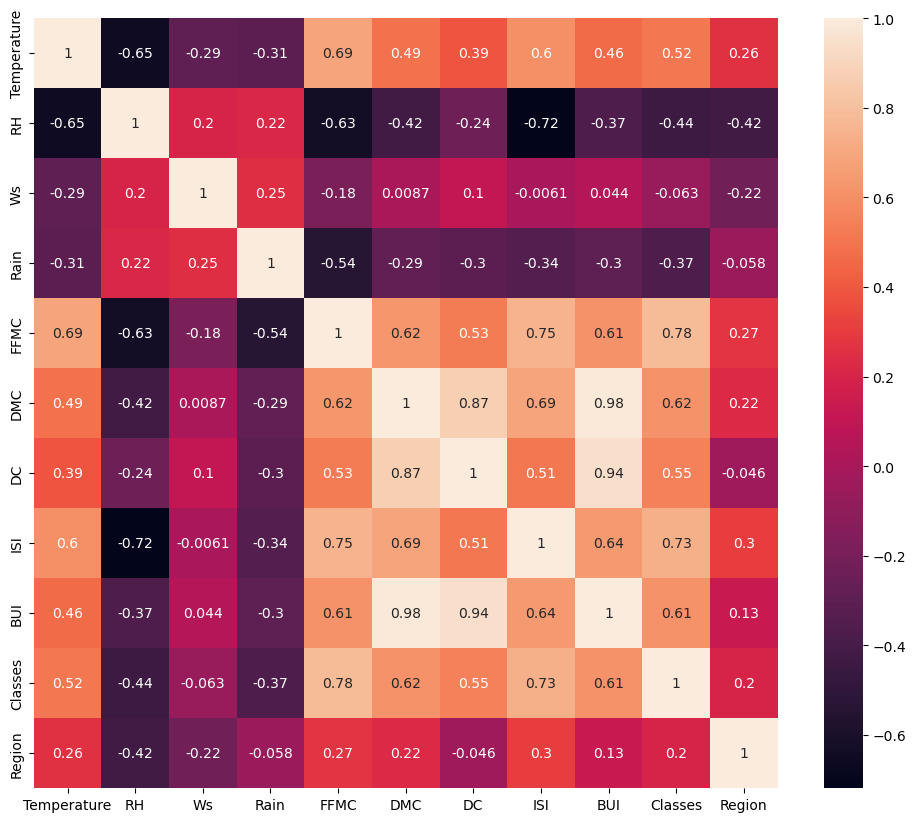

In [65]:
#check for multi-collinearity
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [69]:
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [71]:
corr_features = correlation(x_train, 0.85)

In [73]:
corr_features

{'BUI', 'DC'}

In [75]:
x_train.drop(corr_features, axis =1 , inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)
x_train.shape, x_test.shape

((162, 9), (81, 9))

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<Figure size 640x480 with 0 Axes>

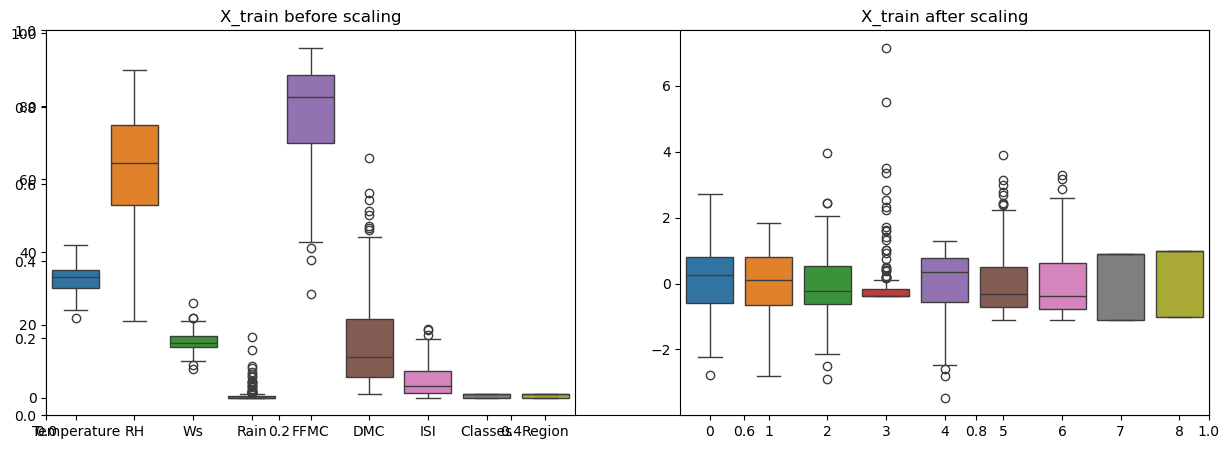

In [85]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train after scaling')
plt.show()

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
linear = LinearRegression()

In [91]:
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [93]:
y_pred = linear.predict(x_test_scaled)

In [95]:
y_pred

array([ 8.22824619,  7.78215852, -0.25828998,  4.38055759,  6.68222943,
        1.3622597 ,  1.99945794,  7.8355231 ,  1.75018462,  3.38281514,
        0.39430907,  9.77499654,  9.34088351, 17.0031456 , 18.46405093,
        1.27800873,  1.96842081, -0.13276177,  7.16594485,  3.0815781 ,
        1.40741562,  0.18075746,  6.61692105,  0.30350512, 21.01326642,
        5.12525044,  5.95195917,  9.79455912, -0.10781944,  9.74431038,
        6.59526666, -0.41271825, 10.37821088, 14.54681696,  1.534249  ,
        0.44968093,  2.03021843,  6.11533999, -0.58567088, -0.50816843,
        6.70967918,  1.89400102,  8.65548055, -0.39939666, 15.42446579,
        8.30696806,  8.17037058,  1.429858  , 12.91587627,  1.21897904,
       29.50229226,  5.57023   , 17.21300934, 19.44599949, 13.78147012,
       16.16976915,  0.66101829,  8.98278392,  3.59370818, 14.64105141,
        5.14896687,  0.79459158, -0.54252859, 21.87012705,  3.25163001,
        1.75067189,  9.70047411,  6.92953233, 10.47866997, -0.37

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [101]:
print(mae)
print(mse)

0.5767877823415986
0.6789097213117232


In [103]:
score = r2_score(y_test, y_pred)

In [105]:
print(score)

0.9845563190792226


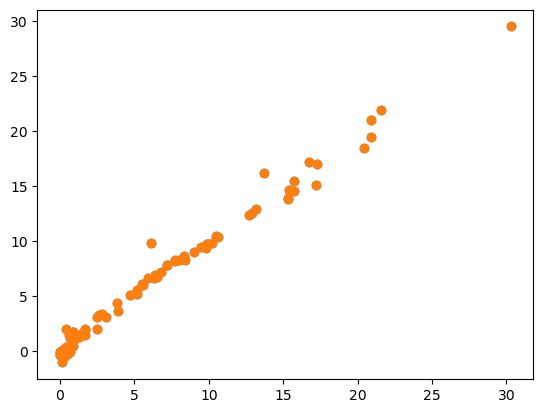

In [109]:
plt.scatter(y_test, y_pred)
plt.show()

# Ridge and Lasso

In [118]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)

In [122]:
lasso.fit(x_train_scaled, y_train)

LassoCV(cv=5)

In [130]:
y_pred = lasso.predict(x_test_scaled)

In [128]:
r = r2_score(y_test, y_pred)
print(r)

0.983629786213086


In [132]:
lasso.alpha_

0.03318346689607894

In [134]:
lasso.alphas_

array([7.14916122, 6.66733168, 6.21797584, 5.79890508, 5.40807829,
       5.04359191, 4.7036707 , 4.38665903, 4.0910129 , 3.81529232,
       3.55815439, 3.31834669, 3.09470123, 2.88612872, 2.69161331,
       2.51020758, 2.34102799, 2.18325054, 2.03610676, 1.89887998,
       1.77090182, 1.65154897, 1.54024009, 1.43643307, 1.33962229,
       1.24933623, 1.16513515, 1.08660894, 1.01337513, 0.94507704,
       0.88138201, 0.82197981, 0.76658112, 0.71491612, 0.66673317,
       0.62179758, 0.57989051, 0.54080783, 0.50435919, 0.47036707,
       0.4386659 , 0.40910129, 0.38152923, 0.35581544, 0.33183467,
       0.30947012, 0.28861287, 0.26916133, 0.25102076, 0.2341028 ,
       0.21832505, 0.20361068, 0.189888  , 0.17709018, 0.1651549 ,
       0.15402401, 0.14364331, 0.13396223, 0.12493362, 0.11651351,
       0.10866089, 0.10133751, 0.0945077 , 0.0881382 , 0.08219798,
       0.07665811, 0.07149161, 0.06667332, 0.06217976, 0.05798905,
       0.05408078, 0.05043592, 0.04703671, 0.04386659, 0.04091

In [148]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [150]:
ridge.fit(x_train_scaled, y_train)

Ridge()

In [178]:
y_test.shape

(81,)

In [180]:
x_test_scaled.shape

(81, 9)

In [186]:
y_pred = ridge.predict(x_test_scaled)

In [188]:
r2_score(y_test, y_pred)

0.9839564989246833

In [190]:
import pickle

In [192]:
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))